In [26]:
from MORL_analysis_utils import  plot_grouped_bar_plot, plot_total_sums

from MO_PPO_train_utils import load_saved_data
import itertools
from MORL_analysis_utils import generate_variable_name
from MORL_analysis_utils import plot_multiple_subplots
import itertools
import numpy as np

In [27]:
num_episodes_list = [2000]
weights_list = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]
results_dir = "training_results"

In [28]:
loaded_data = {}
# Loop through all combinations of num_episodes and weights
for num_episodes, weights in itertools.product(num_episodes_list, weights_list):
    # Load the reward matrix and actions
    reward_matrix, actions, total_steps, params = load_saved_data(weights=weights, results_dir=results_dir, num_episodes=num_episodes)
    
    # Generate variable names based on the specifications
    reward_var_name = generate_variable_name("reward_matrix", num_episodes, weights)
    actions_var_name = generate_variable_name("actions", num_episodes, weights)
    total_steps_var_name = generate_variable_name("total_steps", num_episodes, weights)
    
    # Store the data in the dictionary
    loaded_data[reward_var_name] = reward_matrix
    loaded_data[actions_var_name] = actions
    loaded_data[total_steps_var_name] = total_steps


# Access the loaded data using the generated variable names
#for key in loaded_data.keys():
#    print(f"{key}: {loaded_data[key]}")

Loaded results from training_results\results_weights_1_0_0_episodes_2000.npz
Loaded model from training_results\model_weights_1_0_0_episodes_2000.pth
Loaded parameters from training_results\params_weights_1_0_0_episodes_2000.json
Loaded results from training_results\results_weights_0_1_0_episodes_2000.npz
Loaded model from training_results\model_weights_0_1_0_episodes_2000.pth
Loaded parameters from training_results\params_weights_0_1_0_episodes_2000.json
Loaded results from training_results\results_weights_0_0_1_episodes_2000.npz
Loaded model from training_results\model_weights_0_0_1_episodes_2000.pth
Loaded parameters from training_results\params_weights_0_0_1_episodes_2000.json


In [37]:
len(total_steps)

2000

In [39]:
reward_matrix.shape

(2000, 3)

In [50]:
def normalize_reward_matrix(reward_matrix, EpisodeDuration=True):
    
    normalized_reward_matrix = reward_matrix / total_steps[:, np.newaxis]
    if EpisodeDuration: 
        normalized_reward_matrix[:,0] = reward_matrix[:,0]
    return normalized_reward_matrix

In [51]:
total_steps

array([1542,    3,  285, ...,  463, 1411, 1385])

In [52]:
reward_matrices = [normalize_reward_matrix(loaded_data['reward_matrix_episodes_2000_weights_1_0_0']),
                normalize_reward_matrix(loaded_data['reward_matrix_episodes_2000_weights_0_1_0']), 
                normalize_reward_matrix(loaded_data['reward_matrix_episodes_2000_weights_0_0_1'])
]

settings for loading the files

111.72699734948947 22.43300830777552 22.67674094862299
224.70010944910615 83.83194626910708 86.97982445084247
241.57903357903305 1086.7652749830197 1513.2160296784753


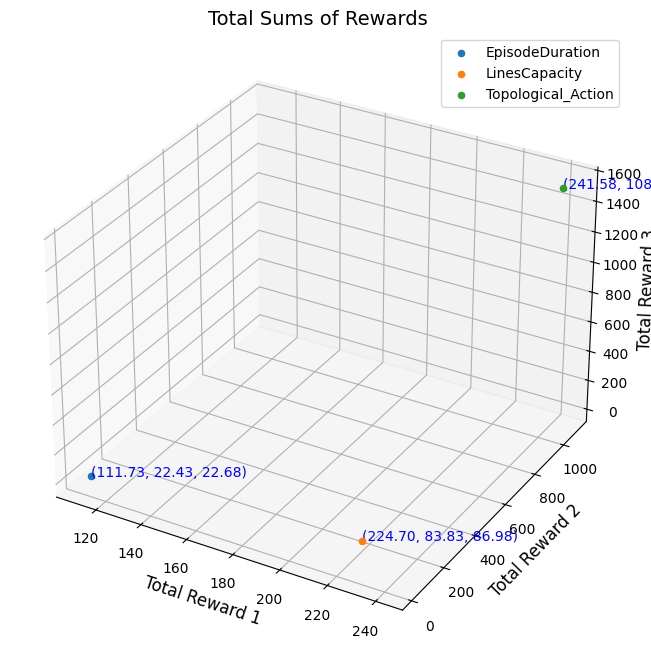

In [53]:
plot_total_sums(reward_matrices=reward_matrices, labels=['EpisodeDuration', 'LinesCapacity', 'Topological_Action'])

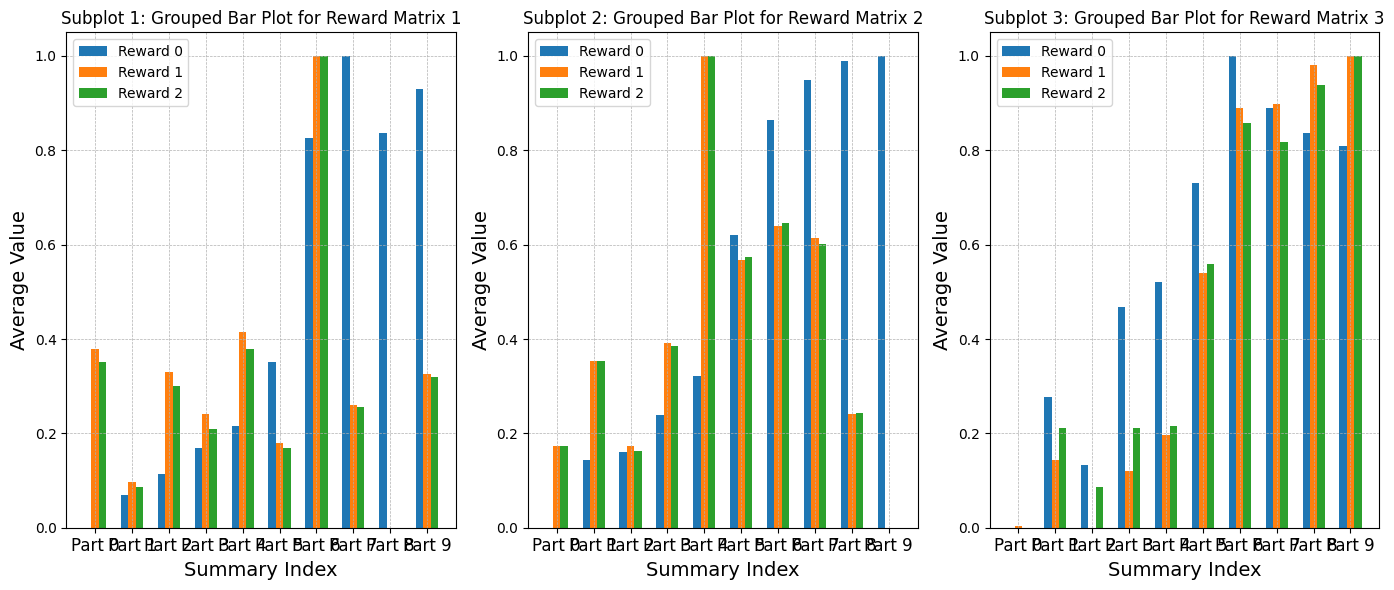

In [54]:
plot_multiple_subplots(reward_matrices=reward_matrices, summed_episodes=200)

In [24]:
import matplotlib.pyplot as plt

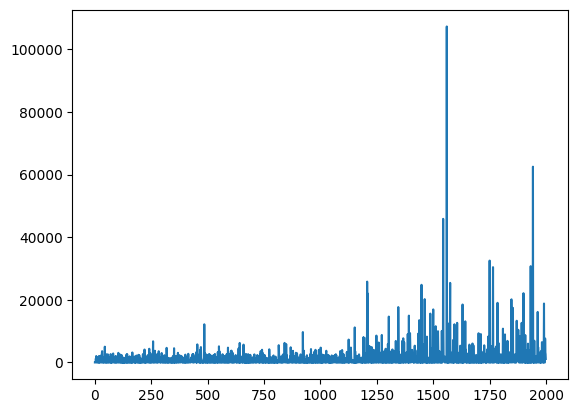

In [25]:
plt.plot(total_steps)